In [1]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

In [2]:
CASE=1
if CASE==0: dname="DATA"
if CASE==1: dname="DATA_b"
#i case==2 dname=data_C.... implement on our own if we want

fname=dname+'/x_RBM_q0.1.dat'
# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
# v = v[1:11]
N = len(v)
L = len(v[1])

#SPINS = True
SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],"\n->",v[i])
    else: print(v[i])
print('...')

print(v.shape)

each of N=10000 data has L=20 digits
[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1]
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0]
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0]
[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0]
[0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0]
...
(10000, 20)


In [3]:
v[0:4]

array([[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]])

In [4]:
cov_data = np.cov(v)/N

## initialize

In [5]:
# RBM, nr of hidden units
if CASE==0: M = 3
if CASE==1: M = 2
# range of each initial weight
sigma = sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w=",w);print("a=",a);print("b=",b)
w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)
print(w.shape)
print(a.shape)
print(b.shape)

w= [[-8.72876393e-02  2.04222126e-01]
 [-2.21489412e-01 -2.36964198e-01]
 [ 8.38211653e-01  5.94150244e-01]
 [ 3.96160518e-02  1.20136963e-01]
 [ 3.27912325e-01  5.31481557e-01]
 [ 4.29466985e-01 -5.52710538e-01]
 [ 1.17256826e-01  9.76087795e-02]
 [ 5.76885677e-01  3.77974741e-01]
 [-8.53501017e-01 -1.58554191e-01]
 [ 7.11674783e-01 -1.87006764e-01]
 [-2.30146526e-01  2.03387092e-01]
 [ 1.38535434e+00 -4.35452880e-01]
 [-2.46070853e-01  5.29254898e-02]
 [ 1.29034856e-01  2.23337160e-01]
 [ 4.00935791e-04  5.73002421e-01]
 [-3.04256178e-01 -3.54405060e-01]
 [-1.01067017e+00 -7.93431066e-01]
 [-3.67028188e-01  2.38846755e-01]
 [-5.39796281e-01  5.10944576e-02]
 [-4.53483232e-01  1.41941667e-01]]
a= [-1.00605956 -0.0850854  -0.6575091  -0.41392318 -0.55731957  0.12209994
  0.16117297 -0.3214583   0.14126068  0.57553201  0.02979552  0.10518219
 -0.0050578   0.4284531   0.56591768 -0.39197445 -0.6605412   0.00945954
  0.32336713 -0.28164852]
b= [0. 0.]
(20, 2)
(20,)
(2,)


## Plotting

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1]


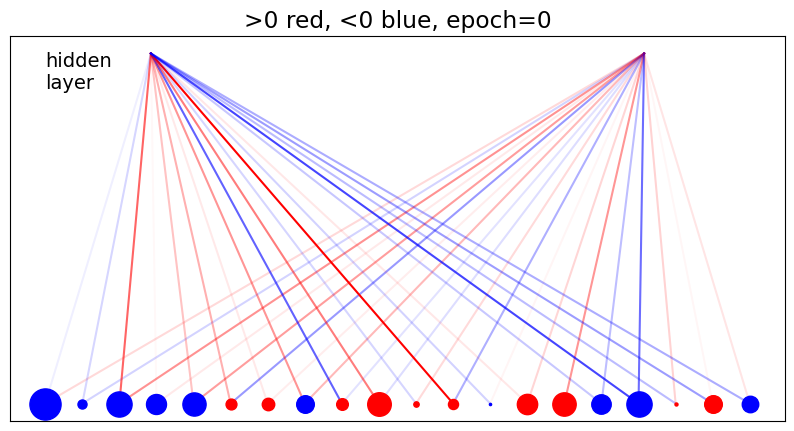

In [6]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(10, 5))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [7]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

## Point 4:

If we simply use the activate function for the backward step of the contrastive divergence, we would generate vectors with 0s and 1s (activating a 1 for each component of the new vector, if a random generated number is under the probability calculated above). If we do so, however, for each 4 blocks of the vector there are $2^4$ possible states, while fot the way in which our data is structured (one-hot encoding) the ''real'' possible states are only 4: 0001,0010,0100,1000.    

Here is what I did:
- I defined a vector that contains all possible states, $s$
- for each entry of our data (a row with 20 elements) I divide it in blocks of 4;
- I compared each block of 4 with each state of s, to recognize to which state it corresponds;
- I compute the energy of the state as  $$E_{state}= \sum_{k \in block}[a_{k}+ \sum_{\nu}W_{k \nu}h_{\nu}]v_{k}$$
  where $v_{k}$ is (each time) the sub-vector of our real vector v constituded by 4 elements;

- I computed the Boltzmann's weights for each of the 4 states as $exp^{-E_{state}}$
- I calculated the normalized probability $p$.

Then, in order to have 4 intervals between 0 and 1, I calculated the cumulative probability for each state: $${C_{prob}}_i=\sum_{j\leq i}p_j$$.    
    
At this point, I have 4 levels that divide the gap 0-1 into 4 intervals. I generate a random number between 0 and 1 and, depending on which interval it belongs, I then generate the corresponding state of s.    
In this way, I generate 4 blocks at a time of the new "fantasy" vector (so I do it $5$ times), preserving the one-hot encoding structure.

In [8]:
s = np.array([[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
vtest = np.array([0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0])
print(vtest)
htest = np.array([0, 0])  


def activate_back(v,h,w,a,k,steps):
    
    e = np.zeros(4)
    
    for i in range(0,20,4):
        for j in range(len(s)):
            if np.array_equiv(v[i:i+4],s[j])==True:
                local_f = a[i:i+4]+np.dot(w[i:i+4,:],h)
                e[j]+= np.dot(local_f,v[i:i+4])
    bol = exp(-e)
    p = bol/bol.sum()
    #print(p)
    cprob = np.zeros(4)
    cprob[0] = p[0]
    for i in range(1,4):
        cprob[i]+=cprob[i-1]+p[i]
        
    vf = np.zeros(20)
    for i in range(0,20,4):
        x = np.random.random()
        if x<=cprob[0]:
            vf[i:i+4]=s[0]
        if cprob[0]<x<=cprob[1]:
            vf[i:i+4]=s[1]
        if cprob[1]<x<=cprob[2]:
            vf[i:i+4]=s[2]
        if cprob[2]<x<=cprob[3]:
            vf[i:i+4]=s[3]
            
    for i in range(0,3):
        if k == 500*i and steps==1:
            print('----initiating backward CD: k = ',k,'----')
            print('WEIGHTS[0] : ', w[0])
            print('EVALUATED ENERGIES = ',e, '\n') 
            print('PROBABILITY : ', p, '\n')                       #it starts to behave strangely after 4,5 epochs
            print('CUMULATIVE PROBABILITY : ', cprob, '\n\n')
            
    return(vf,cprob)

vf, cprob = activate_back(vtest,htest,w,a,1,1)
print(vf)
print(cprob)

[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
[0.21038277 0.49560682 0.63267459 1.        ]


## Energies

In [9]:
def E(v,h):
    ene = -(np.dot((np.dot(v,w)).T,h))-np.dot(a.T,v)-np.dot(b.T,h)
    return ene

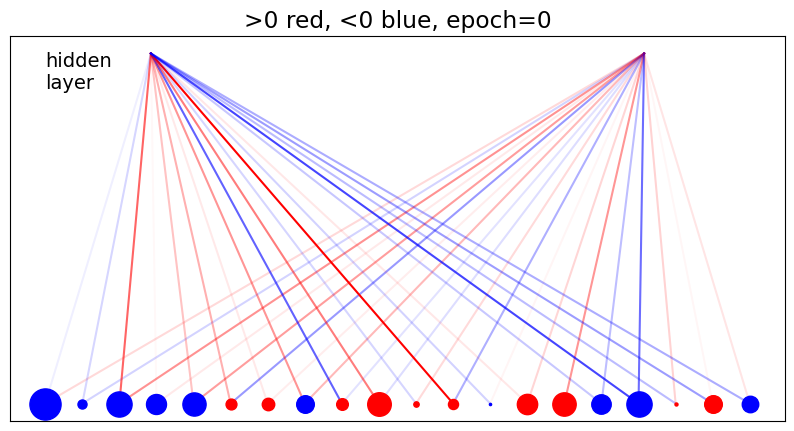

In [10]:
plotgraph(0)

# Training with ADAM +RMS

In [11]:
# funzione di training prende in input il numero di steps ('cd_steps') e il numero di epochs con adam('n_ad')
def training(n_ad,v,w,b,a,cd_steps):
    
    #centering parameters
    eta_mu,eta_lambda=0.01,0.01
    
    # random seed for reproducibility
    np.random.seed(12345)
    N = 10000
    Nv = 20
    epochs = 100
    l_rate = 1.0

    beta1=0.9
    beta2=0.999
    epsilon=1e-8
    m_dw, v_dw = 0, 0
    m_db, v_db = 0, 0
    m_da, v_da = 0, 0
    beta=0.9
    t=1
    
    cov_sum = np.zeros(epochs)
    E_rbm = np.zeros(epochs)
    E_d = np.zeros(epochs)
    V = []
    mini, m = 500, 0

    print('===================================================')

    for epoch in range(epochs):
        l_rate_m = l_rate / mini
        for k in range(N):
            if m==0:
                v_data, v_model = np.zeros(L),np.zeros(L)
                h_data, h_model = np.zeros(M),np.zeros(M)
                vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))
            h = activate(v[k],w,b,GAP)
            hf = h
            vf = v[k]
            for i in range(cd_steps):
                vf,_ = activate_back(vf,hf,w,a,k,i)
                hf = activate(vf,w,b,GAP)
            v_data  += v[k]
            v_model += vf
            h_data  += h
            h_model += hf
            vh_data += np.outer(v[k].T,h)
            vh_model+= np.outer(vf.T,hf)
        
            V.append(vf)
        
        
            E_rbm[epoch] += E(vf,h)
            E_d[epoch] += E(v[k],h)
    
            m += 1
        # minibatch
        
            if m==mini:
                dw = l_rate_m*(vh_data - vh_model)
                da = l_rate_m*(v_data - v_model)       
                db = l_rate_m*(h_data - h_model)
            
                if epoch<=n_ad: #ADAM
                    m_dw = beta1*m_dw + (1-beta1)*(vh_data - vh_model)
                    m_db = beta1*m_db + (1-beta1)*(h_data - h_model)
                    m_da = beta1*m_da + (1-beta1)*(v_data - v_model)

                ## rms beta 2
                    v_dw = beta2*v_dw + (1-beta2)*((vh_data - vh_model)**2)
                    v_db = beta2*v_db + (1-beta2)*((h_data - h_model)**2)
                    v_da = beta2*v_da + (1-beta2)*((v_data - v_model)**2)

                ## bias correction
                    m_dw_corr = m_dw/(1-beta1**t)
                    m_db_corr = m_db/(1-beta1**t)
                    m_da_corr = m_da/(1-beta1**t)

                    v_dw_corr = v_dw/(1-beta2**t)
                    v_db_corr = v_db/(1-beta2**t)
                    v_da_corr = v_da/(1-beta2**t)
            
                ## update weights and biases
                    w = w - l_rate_m*(m_dw_corr/(np.sqrt(v_dw_corr)+epsilon))
                    b = b - l_rate_m*(m_db_corr/(np.sqrt(v_db_corr)+epsilon))
                    a = a - l_rate_m*(m_da_corr/(np.sqrt(v_da_corr)+epsilon))
                    m=0
                    t=t+1 #update the time
                
                else: #RMSprop
                    v_dw = beta*v_dw + (1-beta)*((vh_data - vh_model)**2)
                    v_db = beta*v_db + (1-beta)*((h_data - h_model)**2)
                    v_da = beta*v_da + (1-beta)*((v_data - v_model)**2)
                    w = w - l_rate_m*((vh_data - vh_model)/(np.sqrt(v_dw+epsilon)))
                    b = b - l_rate_m*((h_data - h_model)/(np.sqrt(v_db+epsilon)))
                    a = a - l_rate_m*((v_data - v_model)/(np.sqrt(v_da+epsilon)))

                    m=0
            
                if epoch%10==9 and k<=mini:
                    print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                    print('dw =',dw)
                    print('da =',da)
                    print('db =',db)
                    print('vh_data \n', vh_data, '\n')
                    print('vh_model \n',vh_model)

        Vf = np.array(V)
        cov_vf = np.cov(Vf)
    #covariance:
        for j in range(0,N):
            for i in range(0, j):
                cov_sum[epoch]+=(cov_vf[i,j]-cov_data[i,j])**2
        cov_sum[epoch] = (cov_sum[epoch]*2)/(Nv*(Nv-1))

    #print('E_rbm = ', E_rbm)
    #print('E_data = ', E_d)
    # randomize the order of input data
        np.random.shuffle(v)
        V = []
    # decrease the learning rate (here as a power law)
        l_rate = l_rate / (0.01 * l_rate + 1)
        if epoch%10==9:
            plotgraph(epoch+1)
            print('l_rate = ',l_rate)
    return Vf, E_d, E_rbm, cov_sum    


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.08728764  0.20422213]
EVALUATED ENERGIES =  [-0.73538148  0.          1.00398512 -0.6605412 ] 

PROBABILITY :  [0.38716983 0.18557924 0.06799926 0.35925167] 

CUMULATIVE PROBABILITY :  [0.38716983 0.57274907 0.64074833 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.08528764  0.20622213]
EVALUATED ENERGIES =  [ 0.          0.          0.69363196 -1.66565857] 

PROBABILITY :  [0.12838762 0.12838762 0.0641627  0.67906206] 

CUMULATIVE PROBABILITY :  [0.12838762 0.25677524 0.32093794 1.        ] 


----initiating backward CD: k =  1000 ----
WEIGHTS[0] :  [-0.08332838  0.20817451]
EVALUATED ENERGIES =  [ 0.          0.          0.         -2.06775516] 

PROBABILITY :  [0.09168379 0.09168379 0.09168379 0.72494862] 

CUMULATIVE PROBABILITY :  [0.09168379 0.18336759 0.27505138 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.05025045  0.24271755]
EVALUATED ENERGIES =  [-0.07573264  1.6

----initiating backward CD: k =  1000 ----
WEIGHTS[0] :  [0.13128665 0.43839604]
EVALUATED ENERGIES =  [-0.6157142   0.15636599 -0.29558905  0.        ] 

PROBABILITY :  [0.36652001 0.16935091 0.26611485 0.19801423] 

CUMULATIVE PROBABILITY :  [0.36652001 0.53587092 0.80198577 1.        ] 




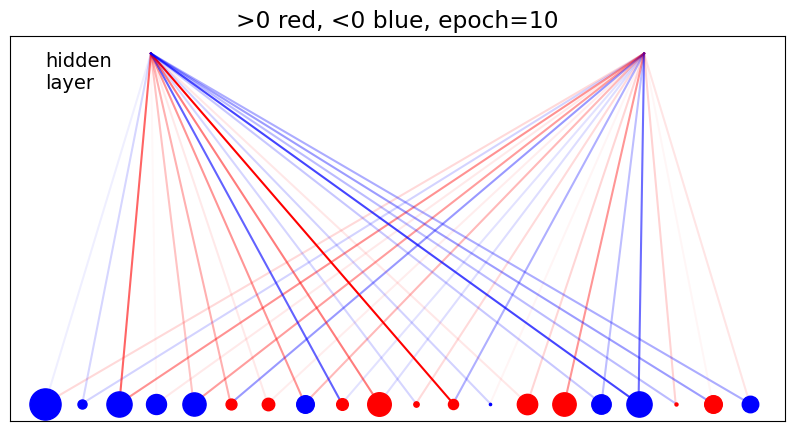

l_rate =  0.9090909090909092
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [0.13178488 0.44658602]
EVALUATED ENERGIES =  [-0.38287082 -0.06236348  0.37354798 -1.23462239] 

PROBABILITY :  [0.22031899 0.15990327 0.10340545 0.51637229] 

CUMULATIVE PROBABILITY :  [0.22031899 0.38022226 0.48362771 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [0.13175483 0.44690188]
EVALUATED ENERGIES =  [-0.43458193 -0.23666339  0.          0.51998134] 

PROBABILITY :  [0.3505141  0.28757463 0.22697026 0.134941  ] 

CUMULATIVE PROBABILITY :  [0.3505141  0.63808873 0.865059   1.        ] 


----initiating backward CD: k =  1000 ----
WEIGHTS[0] :  [0.13192519 0.44732057]
EVALUATED ENERGIES =  [-1.00814202 -0.20304124 -0.30128238  0.        ] 

PROBABILITY :  [0.43381506 0.19393393 0.21395349 0.15829752] 

CUMULATIVE PROBABILITY :  [0.43381506 0.62774899 0.84170248 1.        ] 




KeyboardInterrupt: 

In [12]:
Vf, E_d, E_rbm, cov_sum=training(30,v,w,b,a,2)

In [19]:
print(Vf)
np.savetxt('Vf_ADrms',Vf)
np.savetxt('E_d_ADrms',E_d)
np.savetxt('E_rbm_ADrms',E_rbm)
np.savetxt('2mom_ADrms',cov_sum)

NameError: name 'Vf' is not defined

In [ ]:
Vf_AR = np.loadtxt('Vf_ADrms.txt')
E_d_AR = np.loadtxt('E_d_ADrms.txt')
E_rbm_AR = np.loadtxt('E_rbm_ADrms.txt')
mom_AR = np.loadtxt('2mom_ADrms.txt')
epochs = 100

In [ ]:
l_rate = 1.0
l_tot = np.zeros(100)
for i in range(100):
    l_tot[i]=l_rate
    l_rate = l_rate / (0.01 * l_rate + 1)

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(epochs), E_d_AR, label='Data energy', color='navy')
ax.plot(np.arange(epochs), E_rbm_AR, label='RBM energy', color='indianred')
ax.legend(loc='best')

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(epochs), E_rbm_AR-E_d_AR, label='difference', color='navy')
ax.set_xlabel('Epoch')
ax.set_ylabel('$E_{rbm}-E_{d}$')

In [ ]:
fig, ax = plt.subplots()
ax.plot(l_tot, E_rbm_AR-E_d_AR, label='difference', color='navy')
ax.set_xlabel('Learning rate')
ax.set_ylabel('$E_{rbm}-E_{d}$')

## Second momentum


In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(epochs), mom_AR, label='difference', color='indianred')
ax.set_xlabel('Epochs')
ax.set_ylabel('$\epsilon ^{(2)}$')

In [ ]:
fig, ax = plt.subplots()
ax.plot(l_tot, mom_AR, label='difference', color='indianred')
ax.set_xlabel('Learning rate')
ax.set_ylabel('$\epsilon ^{(2)}$')

## ACCURACY

In [ ]:
#Vf is a matrix composed by 10^4  sequences of lenght 20
#this function detects if a sequence is right or not
#right sequences [p-n-p-n-p] or [n-p-n-p-n]
#p=[01-00] or [10-00]
#n=[00-01] or [00-10]

def select_block_polar(Vf,r):      #This function selects only the FIRST half of the blocks  
    block_1 = Vf[r][0:2]
    block_2 = Vf[r][4:6]
    block_3 = Vf[r][8:10]
    block_4 = Vf[r][12:14]
    block_5= Vf[r][16:18]
    return (block_1,block_2,block_3,block_4,block_5)

def select_block_npolar(Vf,r):      #This function selects only the SECOND half of the blocks  
    block_1 = Vf[r][2:4] 
    block_2 = Vf[r][6:8]
    block_3 = Vf[r][10:12]
    block_4 = Vf[r][14:16]
    block_5= Vf[r][18:20]
    return (block_1,block_2,block_3,block_4,block_5)

def fracion_unlearned(Vf):
    
    C=0 #number of correctly learned sequences
    for r in range(0, Vf.shape[0]):
        block_1,block_2,block_3,block_4,block_5=select_block_polar(Vf,r)
        if (block_1== 1).sum() == 1 and (block_3== 1).sum() == 1 and (block_5== 1).sum() == 1: 
            if (block_2==1).sum() ==0 and (block_4==1).sum() ==0:
                C=C+1

    for r in range(0, Vf.shape[0]):
        block_1,block_2,block_3,block_4,block_5=select_block_npolar(Vf,r)
        if (block_1== 1).sum() == 1 and (block_3== 1).sum() == 1 and (block_5== 1).sum() == 1: 
            if (block_2==1).sum() ==0 and (block_4==1).sum() ==0:
                C=C+1
    
    R=(C/Vf.shape[0])*100
    print('The fraction of correct sequences in output of the RBM is: ', R , '%')
    print(C)
    
    return R

R = fracion_unlearned(Vf_AR) #THIS IS THE WAY TO COMPUTE THE FRACTION OF WRONG SAMPLES


# Optional 5. plot the weights 


Plot the weights wiμ of each hidden unit μ
in an A×G table, with a color map preserving the
rule that red means positive and blue
means negative weight

In [ ]:
print('w0=',w0);print('a0=',a0);print('b0=',b0)
print('w=',w);print('a=',a);print('b=',b)


In [ ]:
w1=[w[:,i].reshape(4,5) for i in range(M)]
import seaborn as sns

fig, axs = plt.subplots(ncols=6, figsize=(5*6,4))
for i in range(M):
    sns.heatmap(w1[i], cmap='coolwarm', annot=False, ax=axs[i])
    axs[i].set_title(f'Hidden Unit {i+1}')
    plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(35,15))
for i in range(M):
    sns.heatmap(w1[i], cmap='coolwarm', annot=False, ax=axs.flat[i])
    axs.flat[i].set_title(f'Hidden Unit {i+1}')
plt.show()



In [ ]:
#FARE SIMULAZ CON DIVERSI OTTIMIZZATORI E PLOTTARE GLI INDICATORI INSIEME